# Car's Price Prediction-Classification

## Importing needed libraries 

In [327]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [328]:
df = pd.read_csv(r"G:\Other computers\My old laptop\Desktop\;\Data Science\Data Science Projects\Car price preditiction -classification\car_price_prediction.csv")

In [329]:
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [330]:
df.shape

(19237, 18)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [332]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [333]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [334]:
df.duplicated().sum()

313

In [335]:
df = df.drop_duplicates()

# Data Analysis

In [337]:
df.head(1)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [338]:
df['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [339]:
for col in df.columns:
    print(col, ": ", df[col].nunique())

ID :  18924
Price :  2315
Levy :  559
Manufacturer :  65
Model :  1590
Prod. year :  54
Category :  11
Leather interior :  2
Fuel type :  7
Engine volume :  107
Mileage :  7687
Cylinders :  13
Gear box type :  4
Drive wheels :  3
Doors :  3
Wheel :  2
Color :  16
Airbags :  17


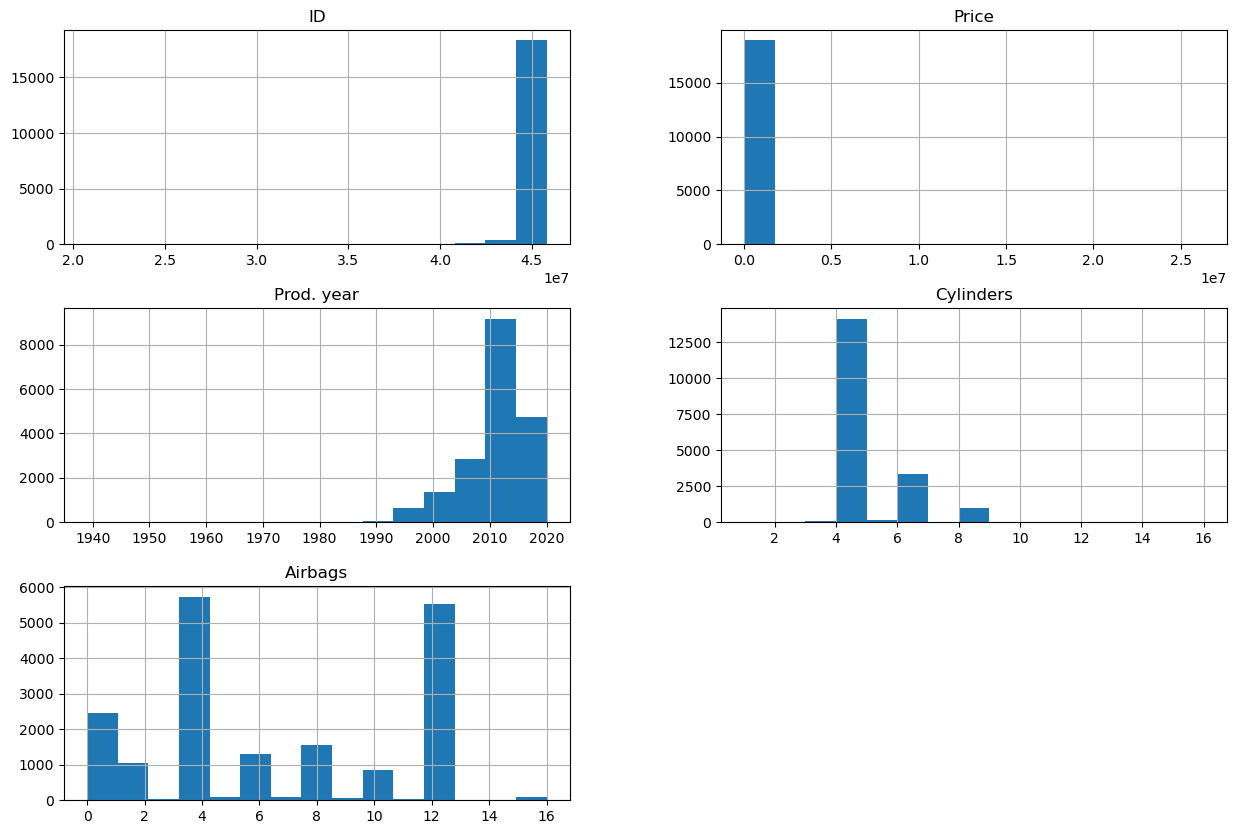

In [340]:
df.hist(bins=15, figsize=(15,10))
plt.show()

In [341]:
topcars = df['Manufacturer'].value_counts().sort_values(ascending = False)[:10]

<Axes: xlabel='Manufacturer'>

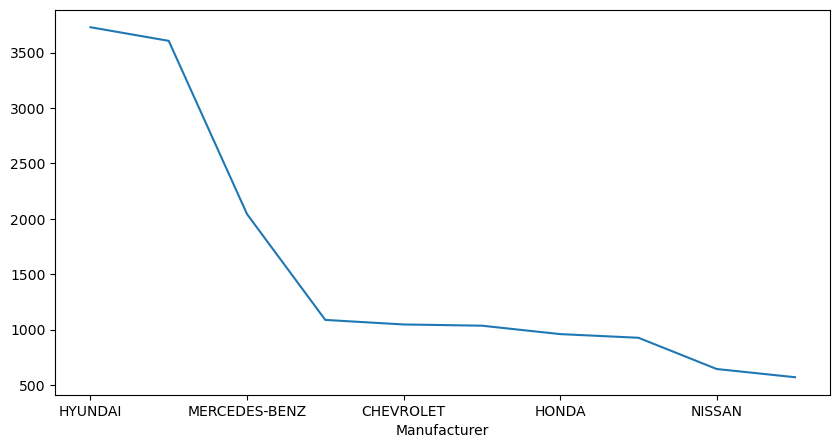

In [342]:
topcars.plot(figsize=(10, 5))

In [343]:
df['Manufacturer'] == i for i in list(topcars.index):
    

SyntaxError: invalid syntax (2039420315.py, line 1)

In [ ]:
df['Manufacturer'].info()

In [ ]:
average_prices = df.groupby('Manufacturer')['Price'].mean()

In [ ]:
average_prices[:10]

In [ ]:
numdata = df.select_dtypes(include=['number'])
numdata.corr()

In [ ]:
sns.heatmap(numdata.corr(), annot= True, linewidth='0.1')
plt.show()


In [ ]:
strdata = df.select_dtypes(include = 'object')

In [ ]:
strdata.head(2)

In [ ]:
for col in strdata:
    plt.figure(figsize = (15,5))
    top10 = strdata[col].value_counts()[:10]
    colors= ['red', 'green','yellow','blue']
    top10.plot(kind = 'bar', color= colors)
   
    plt.title('Top 10 '+col)


# Data Processing

In [ ]:
df

In [ ]:
df = df.drop(['Doors','ID'], axis =1)

In [ ]:
df

In [ ]:
import datetime
date =datetime.datetime.now()

In [ ]:
df['carage'] = date.year- df['Prod. year']
carage

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.Levy.replace({'-':'0'}, inplace = True)

In [ ]:
df.head(5)

In [ ]:
df['Levy']=df['Levy'].astype(int)

In [ ]:
df['Mileage'] = df['Mileage'].str.replace('km','')

In [ ]:
df.head(10)

In [ ]:
df['Engine volume'] = df['Engine volume'].str.replace('Turbo','')

In [ ]:
df['Engine volume']=df['Engine volume'].astype(float)

In [ ]:
df.info()

## Outliers

In [ ]:
sns.boxplot(df['Engine volume'])

In [ ]:
df.describe()

In [ ]:
## finding outliers

numdata = df.select_dtypes(exclude = 'object')

for col in numdata :
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr

    outlier = ((numdata[col]>high)|(numdata[col]<low)).sum()
    nudata = numdata[col].shape[0]
    z=  round((outlier/nudata)*100,2)
    print ('The total outliers in ', col,'are :',outlier,'-', z,'%' )
    if outlier>0:
        df = df.loc[(df[col]<=high) & (df[col]>=low)]

In [ ]:
df.info()

In [ ]:
df['Levy']=df['Levy'].astype(float)
df['Manufacturer']=df['Manufacturer'].astype(float)
df['Model']=df['Model'].astype(float)
df['Category']=df['Category'].astype(float)
df['Leather interior']=df['Leather interior'].astype(float)
df['Fuel type']=df['Fuel type'].astype(float)
df['Engine volume']=df['Engine volume'].astype(float)
df['Mileage']=df['Mileage'].astype(float)
df['Gear box type']=df['Gear box type'].astype(float)
df['Drive wheels']=df['Drive wheels'].astype(float)
df['Doors']=df['Doors'].astype(float)
df['Wheel']=df['Wheel'].astype(float)
df['Color']=df['Color'].astype(float)

# Transforming str to numeric

In [ ]:
object = df.select_dtypes(include = 'object')
notobject = df.select_dtypes(exclude = 'object')

#calling labelencoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
for i in range(0,object.shape[1]):
    object.iloc[:,i] = le.fit_transform(object.iloc[:,i])

In [ ]:
df = pd.concat([object,notobject], axis = 1)

In [ ]:
df.info()

# Model building

In [ ]:
x = df.drop(columns=['Price'])


In [ ]:
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 20)

In [ ]:

pip install xgboost


In [ ]:
# needed imports

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_squared_error, r2_score


In [368]:
Algorithm = [ 'LinearRegression', 'XGBRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'SVR']
R_2= []
RM_SE =[]

In [370]:
def mod(y):
    y.fit(x_train,y_train)
    pre = y.predict(x_test)
    r2 = r2_score(y_test, pre)
    rmse= np.sqrt(mean_squared_error(y_test, pre))
    R_2.append(r2)
    RM_SE.append(rmse)
    score = y.score(x_test,y_test)
    print('the score of model: ', score)

In [373]:
a = LinearRegression()
b= XGBRegressor()
c=DecisionTreeRegressor()
d=RandomForestRegressor()
e= GradientBoostingRegressor()
f = SVR()


In [375]:
mod(a)
mod(b)
mod(c)
mod(d)
mod(e)
mod(f)

the score of model:  0.2467401496270204
the score of model:  0.8103367117666049
the score of model:  0.659982603079105
the score of model:  0.8112774743769733
the score of model:  0.702756647486867
the score of model:  -0.030656757818329883


In [377]:
models_scores = pd.DataFrame({'Algorithms':Algorithm ,'R2_Score':R_2 ,'RMSE': RM_SE})

In [379]:
models_scores

,Algorithms,R2_Score,RMSE
0,LinearRegression,0.246740,10102.902652
1,XGBRegressor,0.810337,5069.503140
2,DecisionTreeRegressor,0.659983,6787.726387
3,RandomForestRegressor,0.811277,5056.914705
4,GradientBoostingRegressor,0.702757,6346.434964
5,SVR,-0.030657,11817.640819


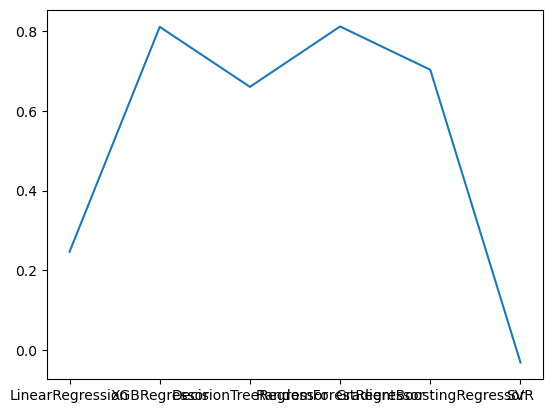

In [397]:

plt.plot(models_scores.Algorithms,models_scores.R2_Score)

In [399]:
import pickle 

In [403]:
filename = 'Carprediction.sav'

In [405]:
pickle.dump(c,open(filename,'wb'))